# 3. Exploring and explaining happiness

In the data happiness.xlsx from here you can find happiness scores as well as a visualization of all the countries happiness along with different variables to explain the happiness to various levels. Do exploratory data analysis on this dataset, then pick out a few visualizations that you turn into explanatory data analysis using the principles of data storytelling.

In [1]:
import pandas as pd
import duckdb 

df = pd.read_excel("data/happiness.xlsx")
df.head()

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026


In [2]:
df_happies_country = df.sort_values(by="Ladder score", ascending=False).head()

In [3]:
df_happies_country = df_happies_country[["Country name", "Ladder score"]].set_index("Country name")

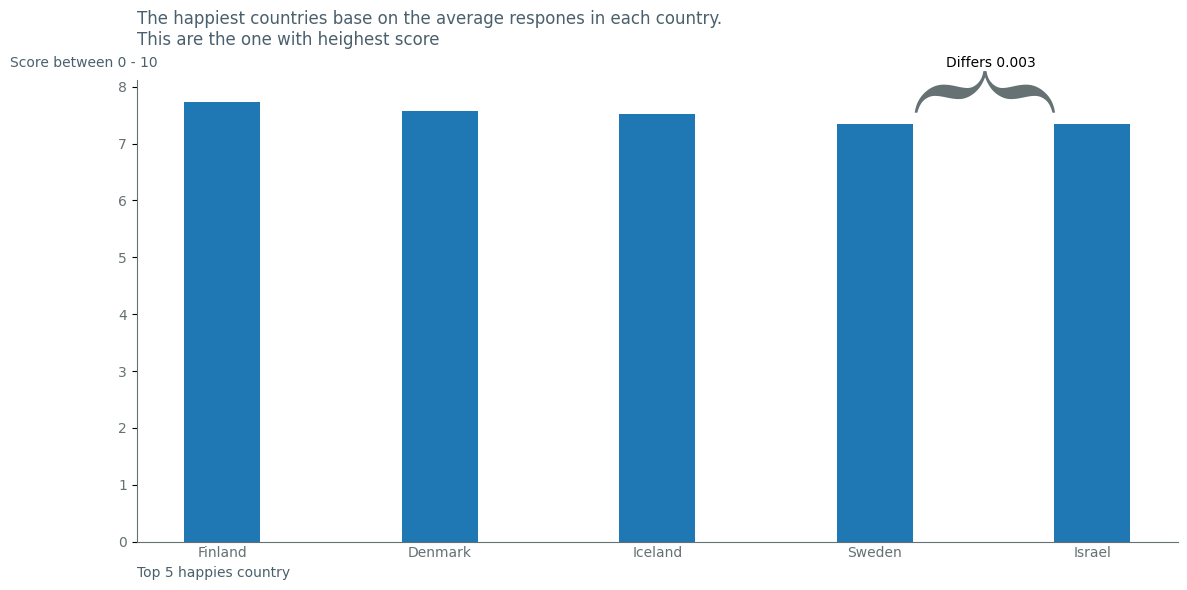

In [4]:
import matplotlib.pyplot as plt
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1, RED_1, RED_2, RED_3




fig, ax = plt.subplots(figsize= (12,6))
ax.bar(df_happies_country.index, height=df_happies_country["Ladder score"], width= 0.35)


# clutters
ax.spines[["top", "right"]].set_visible(False)
ax.tick_params("x", length= 0)

# contast
ax.spines[["left", "bottom"]].set_color(GRAY_2)
ax.tick_params("both", labelcolor= GRAY_2)

# description title and label - call to action (CTA)
ax.set_title("The happiest countries base on the average respones in each country. \nThis are the one with heighest score", loc= "left", color= GRAY_3, pad= 25)
ax.set_ylabel("Score between 0 - 10", loc = "top", color= GRAY_3, rotation= 0)
ax.yaxis.set_label_coords(0.02,1.02)
ax.set_xlabel("Top 5 happies country", loc= "left", color= GRAY_3)


# annotation with { 
bars = ax.containers[0]

bar= bars[3]

x= bar.get_x()
y= bar.get_height()
    
ax.text(x + 0.58, y + 0.3, "{", ha= "center", va= "center", fontsize= 110, rotation= 270, color= GRAY_2, family= "Times New Roman")

ax.text(x + 0.5, y + 1, "Differs 0.003")


fig.tight_layout()
fig.savefig("figures/top_5_happies.png", dpi= 300)
plt.show()


In [5]:
df

,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,7.7407,7.814808,7.666591,1.844054,1.572367,0.694793,0.859294,0.141674,0.546158,2.082367
1,Denmark,7.5827,7.665297,7.500103,1.907798,1.520361,0.698944,0.822740,0.203579,0.548413,1.880887
2,Iceland,7.5251,7.617527,7.432673,1.880718,1.616525,0.718345,0.818509,0.258344,0.182473,2.050233
3,Sweden,7.3441,7.421563,7.266637,1.878146,1.500826,0.723871,0.838269,0.221455,0.523795,1.657707
4,Israel,7.3411,7.405165,7.277036,1.802934,1.512793,0.739816,0.641463,0.153205,0.192823,2.298026
...,...,...,...,...,...,...,...,...,...,...,...
138,Congo (Kinshasa),3.2954,3.462328,3.128472,0.533670,0.664700,0.261508,0.472705,0.188676,0.072167,1.102014
139,Sierra Leone,3.2452,3.366252,3.124148,0.654278,0.565977,0.253321,0.469035,0.181365,0.053299,1.067906
140,Lesotho,3.1862,3.468785,2.903615,0.770807,0.850587,0.000000,0.523188,0.082087,0.084969,0.874525
141,Lebanon,2.7065,2.796744,2.616256,1.376726,0.576713,0.556247,0.173223,0.067641,0.028772,-0.072831


In [6]:
df["perc_diff_whisker"] = ((df["upperwhisker"] / df["lowerwhisker"] - 1) * 100).round(2)

In [7]:
df_top_5_differnce_whisker = df.sort_values("perc_diff_whisker", ascending=False).head()

In [8]:
df_top_5_differnce_whisker.reset_index(drop= True, inplace=True)

In [9]:
df_top_5_differnce_whisker = df_top_5_differnce_whisker[["Country name", "Ladder score", "perc_diff_whisker"]].set_index("Country name")

In [10]:
df_top_5_differnce_whisker

,Ladder score,perc_diff_whisker
Country name,,
Lesotho,3.1862,19.46
Comoros,3.5663,11.13
Botswana,3.3834,10.85
Congo (Kinshasa),3.2954,10.67
Eswatini,3.5020,10.28


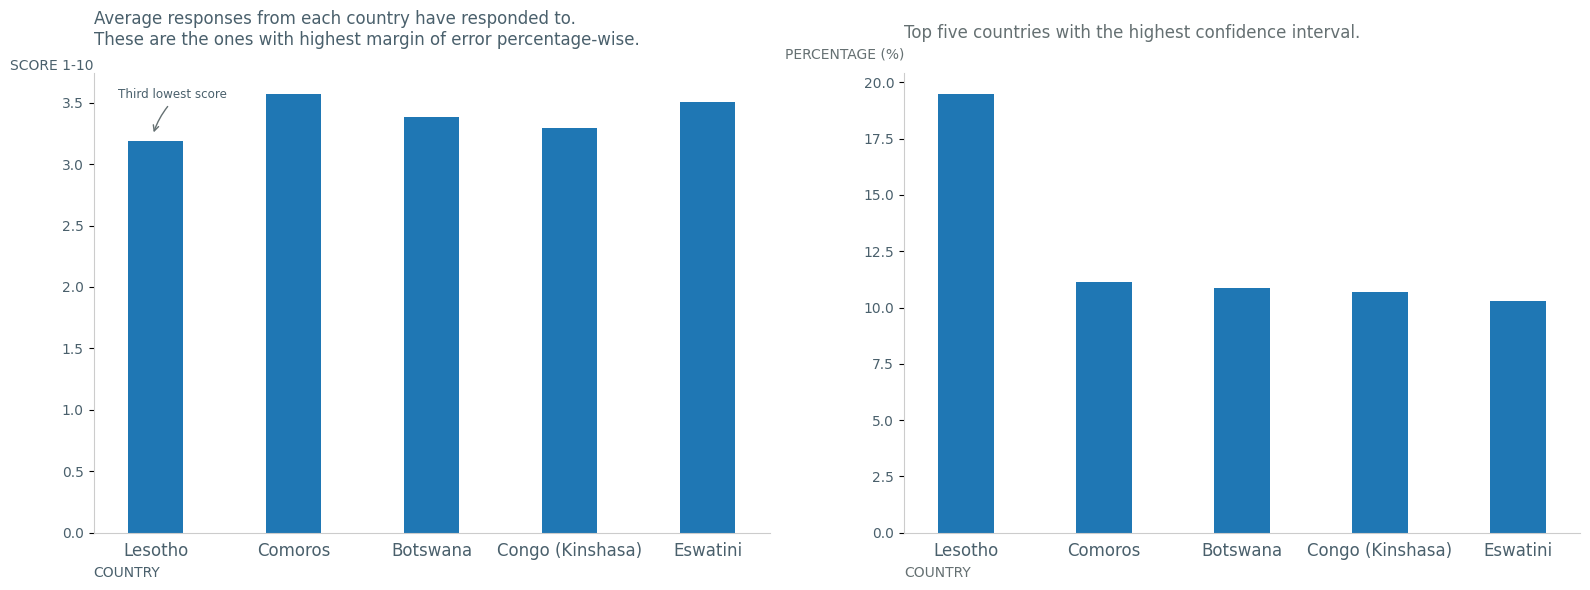

In [11]:
fig, ax = plt.subplots(1,2, figsize= (16,6))


# plot one and two 
df_top_5_differnce_whisker["Ladder score"].plot(kind="bar", ax=ax[0], width= 0.4)
df_top_5_differnce_whisker["perc_diff_whisker"].plot(kind= "bar", ax= ax[1], width= 0.4)


#clutter
ax[0].tick_params(left= True, bottom= False)
ax[0].spines[["top", "right"]].set_visible(False)
ax[1].tick_params(left= True, bottom= False)
ax[1].spines[["top", "right"]].set_visible(False)

# contrast
ax[0].tick_params(axis="x", rotation= 0, labelsize= 12, labelcolor= GRAY_3)
ax[0].tick_params(axis="y", labelcolor= GRAY_3)
ax[0].spines[["left", "bottom"]].set_color(GRAY_1)
ax[1].tick_params(axis="x", rotation= 0, labelsize= 12, labelcolor= GRAY_3)
ax[1].tick_params(axis= "y", labelcolor= GRAY_3)
ax[1].spines[["left", "bottom"]].set_color(GRAY_1)


# description title and label - Call TO Action (CTA)
ax[0].set_title("Average responses from each country have responded to. \nThese are the ones with highest margin of error percentage-wise.", 
                loc= "left", 
                pad= 20, 
                color= GRAY_3)
ax[0].set_ylabel("SCORE 1-10", loc= "top", rotation= 0, color= GRAY_3)
ax[0].yaxis.set_label_coords(0,1)  # position y-label 
ax[0].set_xlabel("COUNTRY", loc= "left", color= GRAY_3)

ax[1].set_title("Top five countries with the highest confidence interval.", loc= "left", color= GRAY_2, pad= 25)
ax[1].set_ylabel("PERCENTAGE (%)", loc= "top", rotation= 0, color= GRAY_2)
ax[1].yaxis.set_label_coords(0,1.025)
ax[1].set_xlabel("COUNTRY", loc= "left", color= GRAY_2)

# text and annotation with -> 
bars = ax[0].containers[0]
bar = bars[0]
x= bar.get_x() - bar.get_width() / 2
y= bar.get_height()

ax[0].text(x + 0.13, y + 0.35, "Third lowest score", color= GRAY_3, fontsize= 8.6)
ax[0].annotate(text="", 
               xy= (x + .38, y + .05), # arrows spets coordinate (end with edge)
               xytext= (x + 0.5, y + 0.3), # arrows comes from (start)
               arrowprops= dict(arrowstyle= "->", linewidth= 1, connectionstyle= "arc3, rad=.1", color= GRAY_2))

fig.tight_layout()
fig.savefig("figures/Top_5_highest_confidence_interval.png", dpi= 300)


In [12]:
df_sweden = df[df["Country name"] == "Sweden"]

In [13]:
df_sweden.columns

Index(['Country name', 'Ladder score', 'upperwhisker', 'lowerwhisker',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'perc_diff_whisker'],
      dtype='object')

In [14]:
df_sweden = df_sweden.drop(["upperwhisker", "lowerwhisker", "perc_diff_whisker"], axis=1)

In [15]:
df_sweden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 3 to 3
Data columns (total 9 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                1 non-null      object 
 1   Ladder score                                1 non-null      float64
 2   Explained by: Log GDP per capita            1 non-null      float64
 3   Explained by: Social support                1 non-null      float64
 4   Explained by: Healthy life expectancy       1 non-null      float64
 5   Explained by: Freedom to make life choices  1 non-null      float64
 6   Explained by: Generosity                    1 non-null      float64
 7   Explained by: Perceptions of corruption     1 non-null      float64
 8   Dystopia + residual                         1 non-null      float64
dtypes: float64(8), object(1)
memory usage: 80.0+ bytes


In [16]:
columns = ["Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Freedom to make life choices", "Explained by: Generosity", "Explained by: Perceptions of corruption", "Dystopia + residual"]


df_sweden.loc[:,columns] = (df_sweden[columns].div(df_sweden["Ladder score"], axis=0) * 100).round(2)



In [17]:
df_sweden.drop("Ladder score", axis=1, inplace=True)

In [18]:
df_sweden = df_sweden.transpose().drop("Country name", axis=0)

In [19]:
df_sweden.columns

Index([3], dtype='int64')

In [20]:
df_sweden.columns = ["Percentage (%)"]

In [21]:
df_sweden = df_sweden.reset_index()

In [22]:
df_sweden.columns = ["Category", "Percentage (%)"]

In [23]:
df_sweden

,Category,Percentage (%)
0,Explained by: Log GDP per capita,25.57
1,Explained by: Social support,20.44
2,Explained by: Healthy life expectancy,9.86
3,Explained by: Freedom to make life choices,11.41
4,Explained by: Generosity,3.02
5,Explained by: Perceptions of corruption,7.13
6,Dystopia + residual,22.57


In [24]:
df_sweden = df_sweden.set_index("Category")

In [60]:
df_sweden.sort_values("Percentage (%)", ascending=False, inplace=True)

Text(0, 0, 'PERCENTAGE')

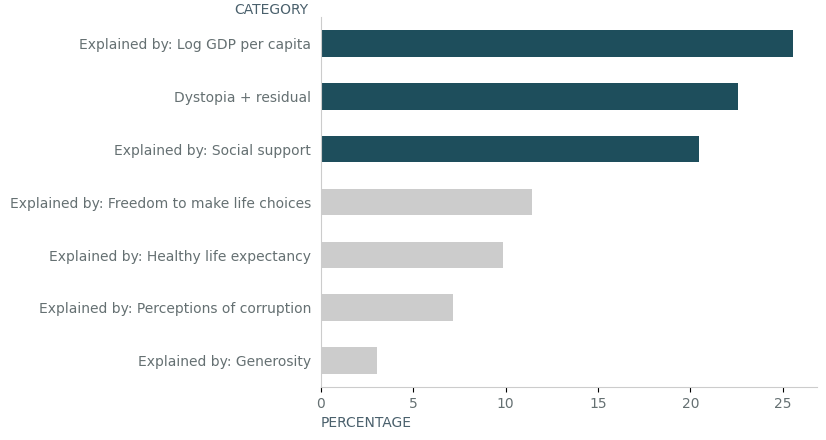

In [76]:

colors = [GRAY_1] * len(df_sweden)
colors[:3] = [BLUE_1] * 3


ax = df_sweden["Percentage (%)"].plot(kind="barh", color= colors)

ax.invert_yaxis()

# Clutter
ax.tick_params(left= False)
ax.spines[["top", "right"]].set_visible(False)

# contrast
ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params("both", labelcolor= GRAY_2)


# description title and label - call to action (CTA)
ax.set_ylabel("CATEGORY", rotation= 0, color= GRAY_3)
ax.yaxis.set_label_coords(-0.1,1)
ax.set_xlabel("PERCENTAGE", color= GRAY_3, loc= "left")